In [1]:
import pandas as pd

In [2]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

In [3]:
data = pd.read_csv(uri)

In [5]:
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [6]:
swap = {
    1: 0,
    0: 1
}

data['finished'] = data['unfinished'].map(swap)

In [7]:
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [8]:
data.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [24]:
x = data[['expected_hours', 'price']]
y = data['finished']

In [25]:
x.head()

,expected_hours,price
0,26,192
1,88,9015
2,89,2577
3,42,275
4,39,170


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: finished, dtype: int64

In [14]:
import seaborn as sns

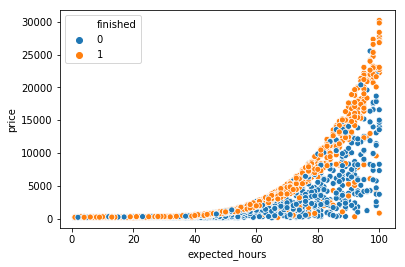

In [27]:
sns.scatterplot(x='expected_hours', y='price', hue='finished', data=data)

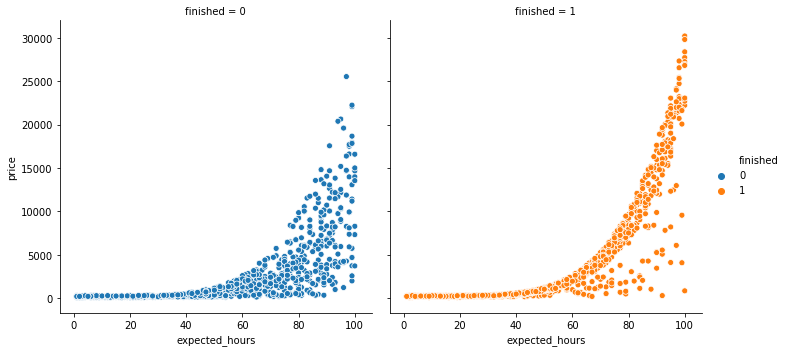

In [28]:
sns.relplot(x='expected_hours', y='price', hue='finished', col='finished', data=data)

In [114]:
from sklearn.svm import LinearSVC

In [115]:
model = LinearSVC()

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=20, stratify=y)

In [118]:
model.fit(train_x, train_y)

/home/flavio/dev/cursos/alura/curso_machine_learning_introducao_a_classificacao/venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [119]:
predict = model.predict(test_x)

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
accuracy_score(test_y, predict) * 100

54.81481481481482